In [ ]:
!pip install xgboost


In [ ]:
#import all dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

from sklearn.utils import resample

#from sklearn.model_selection import GridSearchCV


#from sklearn.metrics import mean_squared_error

# **Data Pre Processing** #


In [ ]:
df = pd.read_csv('/content/bookings_train.csv')

In [ ]:
df. head(10000)

,booking_id,citizen_id,booking_date,appointment_date,appointment_time,check_in_time,check_out_time,task_id,num_documents,queue_number,satisfaction_rating
0,f7b59ba3793fea61282cb02be2247cebd0a75306,4229044420,2021-01-01,2021-01-01,09:03,2021-01-01 09:11:00,2021-01-01 09:48:15.166353269,TASK-002,0,2,4
1,cfe30d53b4b645e4cb6b114f6c9d74a0f25e6a80,5389442635,2021-01-01,2021-01-01,09:12,2021-01-01 09:24:00,2021-01-01 10:24:12.189261137,TASK-001,1,1,4
2,0fb0a5d9b3944dd743a9e7828dc03fa74aa6ebf8,2123783919,2021-01-01,2021-01-01,09:36,2021-01-01 09:29:00,2021-01-01 10:26:48.802260864,TASK-002,1,6,5
3,d4bf826153212fa325ad98b215668ab942365607,6359918966,2021-01-01,2021-01-01,09:45,2021-01-01 10:07:00,2021-01-01 11:00:13.485642822,TASK-001,1,4,4
4,ebb4c9687acbaf65376d8e379bd1341d1c15127e,178732202,2021-01-01,2021-01-01,10:12,2021-01-01 10:26:00,2021-01-01 11:54:53.260180213,TASK-002,1,8,3
...,...,...,...,...,...,...,...,...,...,...,...
9995,93baa8b3058778673e796a452e057fa447209d35,95036770,2021-03-17,2021-03-17,10:41,2021-03-17 10:54:00,2021-03-17 11:35:40.027823026,TASK-008,5,20,4
9996,d3d3b10824aabbcb6b50563a0cf341af5ffda556,5614551621,2021-02-24,2021-03-17,10:47,2021-03-17 11:08:00,2021-03-17 11:58:01.339172584,TASK-009,4,1,4
9997,b915b6b13e40a39f1c8504122159030e374375ac,6745666198,2021-03-05,2021-03-17,10:47,2021-03-17 10:56:00,2021-03-17 11:27:27.452392748,TASK-008,2,4,4
9998,ae72b41232ba927f022fe2c025e37a9e3964e298,8188006305,2021-02-23,2021-03-17,10:55,2021-03-17 11:10:00,2021-03-17 12:05:58.865028594,TASK-009,6,2,4


In [ ]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203693 entries, 0 to 203692
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   booking_id           203693 non-null  object
 1   citizen_id           203693 non-null  int64 
 2   booking_date         203693 non-null  object
 3   appointment_date     203693 non-null  object
 4   appointment_time     203693 non-null  object
 5   check_in_time        197601 non-null  object
 6   check_out_time       197601 non-null  object
 7   task_id              203693 non-null  object
 8   num_documents        203693 non-null  int64 
 9   queue_number         203693 non-null  int64 
 10  satisfaction_rating  203693 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 17.1+ MB


In [ ]:
# Converting into Datetime
df['booking_date'] = pd.to_datetime(df['booking_date'])
df['appointment_date'] = pd.to_datetime(df['appointment_date'])
df['appointment_time'] = pd.to_datetime(df['appointment_time'], errors='coerce').dt.time
df['check_in_time'] = pd.to_datetime(df['check_in_time'], errors='coerce')
df['check_out_time'] = pd.to_datetime(df['check_out_time'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203693 entries, 0 to 203692
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   booking_id           203693 non-null  object        
 1   citizen_id           203693 non-null  int64         
 2   booking_date         203693 non-null  datetime64[ns]
 3   appointment_date     203693 non-null  datetime64[ns]
 4   appointment_time     203693 non-null  object        
 5   check_in_time        197601 non-null  datetime64[ns]
 6   check_out_time       197601 non-null  datetime64[ns]
 7   task_id              203693 non-null  object        
 8   num_documents        203693 non-null  int64         
 9   queue_number         203693 non-null  int64         
 10  satisfaction_rating  203693 non-null  int64         
dtypes: datetime64[ns](4), int64(4), object(3)
memory usage: 17.1+ MB


In [ ]:
#this is not directly used in the model, but can use in future
df['day_of_week'] = df['appointment_date'].dt.dayofweek        # 0=Mon, 6=Sun
df['month'] = df['appointment_date'].dt.month
df['year'] = df['appointment_date'].dt.year
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# **Feature Engineering** #

In [ ]:
df['service_duration'] = (df['check_out_time'] - df['check_in_time']).dt.total_seconds() / 60.0

In [ ]:
# Appointment hour (numeric)
df['appointment_hour'] = pd.to_datetime(df['appointment_time'].astype(str), format='%H:%M:%S', errors='coerce').dt.hour

In [ ]:
df['appointment_year'] = df['appointment_date'].dt.year
df['appointment_month'] = df['appointment_date'].dt.month
df['appointment_day'] = df['appointment_date'].dt.day

In [ ]:
df['appointment_hour'] = df['appointment_time'].dt.hour
df['appointment_minute'] = df['appointment_time'].dt.minute

In [ ]:
# Waiting time in minutes #Note: For future enhancement
df['waiting_time'] = (
    df['check_in_time'] -
    pd.to_datetime(df['appointment_date'].astype(str) + ' ' + df['appointment_time'].astype(str), errors='coerce')
).dt.total_seconds() / 60.0

In [ ]:
# Encoding to Task ID
df['task_id_encoded'] = df['task_id'].astype('category').cat.codes

In [ ]:
# Morning/Afternoon/Evening session
def get_session(hour):
    if 6 <= hour < 12: return "morning"
    elif 12 <= hour < 17: return "afternoon"
    elif 17 <= hour < 21: return "evening"
    else: return "off_hours"

df['session'] = df['appointment_hour'].apply(get_session)

In [ ]:
# Peak hour flag (e.g., 9–12 and 14–16 are busy hours)
df['is_peak_hour'] = df['appointment_hour'].between(9, 12).astype(int) | df['appointment_hour'].between(14, 16).astype(int)

# **Explotary Data Analysis / Data cleaning** #

In [ ]:
df.isnull().sum()

,0
booking_id,0
citizen_id,0
booking_date,0
appointment_date,0
appointment_time,0
check_in_time,6092
check_out_time,6092
task_id,0
num_documents,0
queue_number,0


In [ ]:
df = df.dropna(subset=['check_in_time', 'check_out_time', 'service_duration']).reset_index(drop=True)

## Detecting Outliers


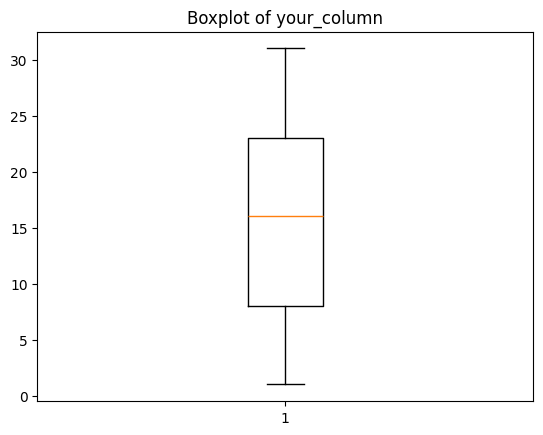

In [ ]:
# Example for a single numeric column
plt.boxplot(df['appointment_day'])
plt.title("Boxplot of your_column")
plt.show()

# **Model Training** #

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197601 entries, 0 to 197600
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   booking_id           197601 non-null  object        
 1   citizen_id           197601 non-null  int64         
 2   booking_date         197601 non-null  datetime64[ns]
 3   appointment_date     197601 non-null  datetime64[ns]
 4   appointment_time     0 non-null       datetime64[ns]
 5   check_in_time        197601 non-null  datetime64[ns]
 6   check_out_time       197601 non-null  datetime64[ns]
 7   task_id              197601 non-null  object        
 8   num_documents        197601 non-null  int64         
 9   queue_number         197601 non-null  int64         
 10  satisfaction_rating  197601 non-null  int64         
 11  day_of_week          197601 non-null  int32         
 12  month                197601 non-null  int32         
 13  year          

In [ ]:
df['service_duration_log'] = np.log1p(df['service_duration'])

In [326]:
# Split into two groups
df_majority = df[df['service_duration'] <= 120]
df_minority = df[df['service_duration'] > 130 ]
#df_more_minority = df[df['service_duration'] > 150]

# Oversample minority >= 101
df_minority_oversampled = resample(
    df_minority,
    replace=True,       # sample with replacement
    n_samples=120000, # match majority count
    random_state=42
)

# Oversample more minority - > 150
df_more_minority_oversampled = resample(
    df_minority,
    replace=True,       # sample with replacement
    n_samples=100000, # match majority count
    random_state=42
)

# Combine
df_balanced = pd.concat([df_majority, df_minority_oversampled, ])



print("Before balancing:", df.shape)
print("After balancing:", df_balanced.shape)
print(df_balanced['service_duration'].gt(100).value_counts())


Before balancing: (197601, 26)
After balancing: (314520, 26)
service_duration
False    189435
True     125085
Name: count, dtype: int64


In [327]:
# Define features (X) and target (y)

feature_cols = ['task_id_encoded', 'appointment_year', 'appointment_month', 'appointment_day','appointment_hour', 'appointment_minute' ]

X = df_balanced[feature_cols]
y = df_balanced['service_duration']   # Target variable

#'is_weekend', 'appointment_hour', 'is_peak_hour',
 #   'num_documents', 'queue_number'

In [328]:
print("\nColumns used for features:")
print(feature_cols)


Columns used for features:
['task_id_encoded', 'appointment_year', 'appointment_month', 'appointment_day', 'appointment_hour', 'appointment_minute']


In [329]:
print("\nTarget column stats:")
print(y.describe())


Target column stats:
count    314520.000000
mean         86.123217
std          53.017210
min           5.922487
25%          38.003510
50%          64.803663
75%         138.070160
max         217.635393
Name: service_duration, dtype: float64


In [330]:
#Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [331]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (251616, 6) (251616,)
Test set shape: (62904, 6) (62904,)


In [332]:
# Initialize XGBoost Model

xgb_model = XGBRegressor(
    n_estimators=50000,       # number of boosting rounds (trees) +
    learning_rate=0.09,     # step size shrinkage
    max_depth=9,            # maximum tree depth +
    subsample=0.8,          # row sampling
    colsample_bytree=0.8,   # feature sampling
    min_child_weight = 1,   # +
    random_state=42,
    n_jobs=-1
)


In [ ]:
import numpy as np

# Transform target
y_train_log = np.log1p(y_train)  # log(1 + y)

# Train model on transformed target
xgb_model.fit(X_train, y_train_log)

# Inverse transform predictions
y_pred_log = xgb_model.predict(X_test)
y_pred = np.expm1(y_pred_log)


In [333]:
#Train the model

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.09, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [334]:
#Make Predictions from test dataset

y_pred = xgb_model.predict(X_test)

In [335]:
print("First 10 predictions vs actual values:")
results = pd.DataFrame({
    "Actual": y_test.iloc[:10].values,
    "Predicted": y_pred[:10]
})
print(results)


First 10 predictions vs actual values:
       Actual   Predicted
0  157.365324  137.225525
1   96.033877   85.933006
2  171.952297  166.335526
3  180.000000  157.009125
4   57.809799   76.466393
5  141.704173  132.416306
6  143.236600  140.638840
7   37.548602   38.767239
8   23.531252   33.520100
9   27.837118   41.964146


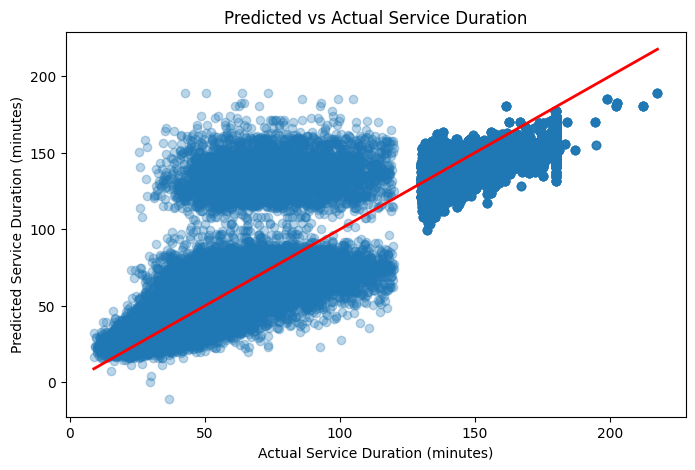

In [336]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2)
plt.xlabel("Actual Service Duration (minutes)")
plt.ylabel("Predicted Service Duration (minutes)")
plt.title("Predicted vs Actual Service Duration")
plt.show()


# **Model Evaluation** #

In [337]:
r2 = r2_score(y_test, y_pred)

In [338]:
print("Model Performance on Test Data:")
#print(f"RMSE: {rmse:.2f} minutes")
#print(f"MAE: {mae:.2f} minutes")
print(f"R² Score: {r2:.4f}")

Model Performance on Test Data:
R² Score: 0.8605


Rows with service_duration > 100: 8166
Rows with service_duration <= 100: 189435


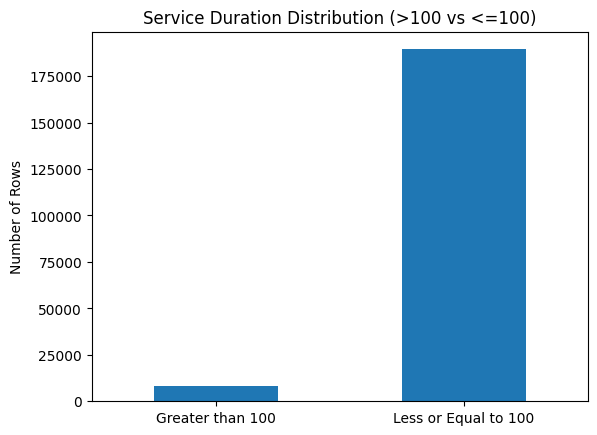

In [257]:
# Count rows greater than 100
greater_100 = df[df['service_duration'] > 100].shape[0]

# Count rows less than or equal to 100
less_equal_100 = df[df['service_duration'] <= 100].shape[0]

print(f"Rows with service_duration > 100: {greater_100}")
print(f"Rows with service_duration <= 100: {less_equal_100}")

# Create a simple bar chart
counts = pd.Series({
    'Greater than 100': greater_100,
    'Less or Equal to 100': less_equal_100
})

counts.plot(kind='bar', rot=0)
plt.title("Service Duration Distribution (>100 vs <=100)")
plt.ylabel("Number of Rows")
plt.show()